<a href="https://colab.research.google.com/github/AnnSenina/Python_for_DH_2023/blob/main/notebooks/%D0%B4%D0%BE%D0%BF%D0%BE%D0%BB%D0%BD%D0%B8%D1%82%D0%B5%D0%BB%D1%8C%D0%BD%D1%8B%D0%B5%20%D1%82%D0%B5%D1%82%D1%80%D0%B0%D0%B4%D0%BA%D0%B8/%D0%9A%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D1%8F__%D0%A7%D0%B0%D1%81%D1%82%D1%8C_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# План:

1. Логистическая регрессия для бинарной классификации
2. Деревья решений (классификация)
3. Иерархический кластерный анализ
4. Метод k-means

# Важно!
Классификация и кластеризация не тождественны:

* классификация - мы заранее знаем, какие классы в наших данных есть, и пытаемся новые объекты рассортировать по этим классам

* кластеризация - мы пытаемся найти новые классы объектов, заранее не знаем, какие и сколько их

## Логистическая регрессия

В отличие от линейной, помогает нам предсказать категориальную переменную (как правило, бинарную)

Считается простым алгоритмом, но точность относительно невысокая

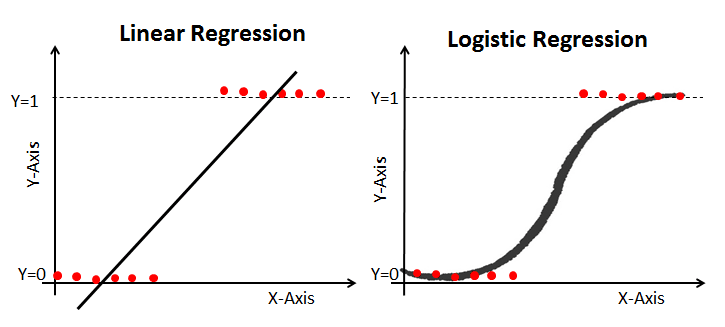

In [ ]:
# все импорты
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import load_dataset
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix

# деревья решений
from sklearn.datasets import load_iris # датасет от sklearn
from sklearn import tree
import graphviz


In [ ]:
# Давайте возьмем один из самый известных датасетов - пассажиры Титаника
df = load_dataset("titanic")
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
# У нас есть столбец alive - выжившие и погибшие
# давайте сразу его перекодируем
df['sex'] = df['sex'].apply(lambda x: 0 if x == 'female' else 1)
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,0,False
1,1,1,0,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,1,False
2,1,3,0,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,1,True
3,1,1,0,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,1,False
4,0,3,1,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,0,True
887,1,1,0,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,1,True
888,0,3,0,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,0,False
889,1,1,1,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,1,True


### Документация

Все очень похоже на линейную регрессию: [ссылка](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

+ Метрики: [ROC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html), [AUC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html)

In [ ]:
x = df[['pclass']] # будем смотреть, как класс пассажира влияет на исход катастрофы
y = df["alive"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 0)

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
y_pred = log_reg.predict(x_test)

In [ ]:
df_logreg = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_logreg

,Actual,Predicted
495,0,0
648,0,0
278,0,0
31,1,1
255,1,0
...,...,...
17,1,0
476,0,0
533,1,0
416,1,0


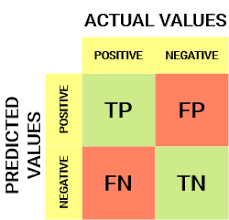

In [ ]:
confusion_matrix(y_pred, y_test)

array([[159,  69],
       [ 25,  42]])

In [ ]:
accuracy_score(y_pred, y_test) # точность модели
# для логистической регресси используют другие показатели точности модели

0.6813559322033899

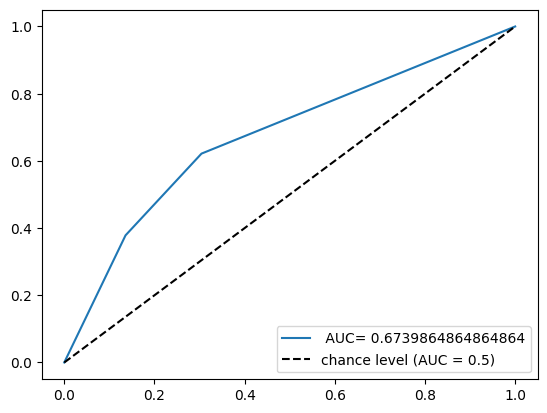

In [ ]:
y_pred_proba = log_reg.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve (y_test, y_pred_proba)
auc = metrics. roc_auc_score (y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label=" AUC= "+str(auc))
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.legend(loc=4);

In [ ]:
print('coefficient:', log_reg.coef_)
print('intercept:', log_reg.intercept_) # для уравнения
print('r2 value:', log_reg.score(x, y))

coefficient: [[-0.85003618]]
intercept: [1.4458097]
r2 value: 0.6790123456790124


In [ ]:
# перекодируйте пол и добавьте в модель
x = df[['pclass', 'sex']] # будем смотреть, как класс пассажира влияет на исход катастрофы
y = df["alive"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 0)

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
y_pred = log_reg.predict(x_test)

In [ ]:
confusion_matrix(y_pred, y_test)

array([[153,  33],
       [ 31,  78]])

In [ ]:
accuracy_score(y_pred, y_test) # точность модели
# для логистической регресси используют другие показатели точности модели

0.7830508474576271

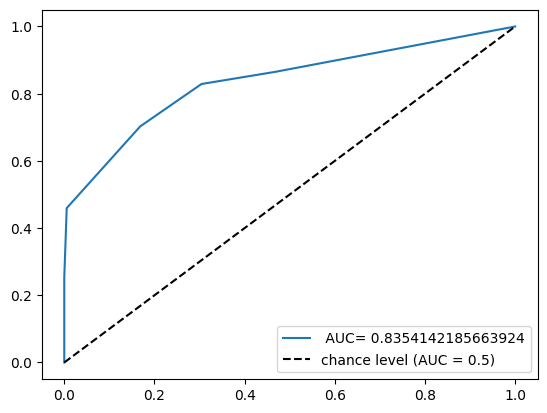

In [ ]:
y_pred_proba = log_reg.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve (y_test, y_pred_proba)
auc = metrics. roc_auc_score (y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label=" AUC= "+str(auc))
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.legend(loc=4);

In [ ]:
print('coefficient:', log_reg.coef_)
print('intercept:', log_reg.intercept_) # для уравнения
print('r2 value:', log_reg.score(x, y))

coefficient: [[-0.88549128 -2.48963069]]
intercept: [3.0689732]
r2 value: 0.7867564534231201


### Еще примеры:
* [Спам-письма](https://github.com/svetlana21/Spam-classifier)
* [Мошенничество](https://vc.ru/u/1389654-machine-learning/651087-poshagovoe-rukovodstvo-po-obnaruzheniyu-moshennichestva-s-ispolzovaniem-logisticheskoy-regressii-python-kompleksnyy-podhod?__cf_chl_tk=7oOPtgov4EKf4x4jPZF9q_Zs63JVd4ywkbxs9kCRruA-1683867846-0-gaNycGzNDOU)
* [Кредиты в банке](https://medium.com/nuances-of-programming/%D0%BF%D0%BE%D1%88%D0%B0%D0%B3%D0%BE%D0%B2%D0%BE%D0%B5-%D0%BF%D0%BE%D1%81%D1%82%D1%80%D0%BE%D0%B5%D0%BD%D0%B8%D0%B5-%D0%BB%D0%BE%D0%B3%D0%B8%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%BE%D0%B9-%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D0%B8-%D0%B2-python-a7c650ae77c2)

## Другой популярный способ классификации - деревья решений

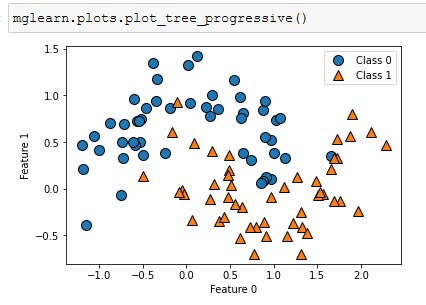

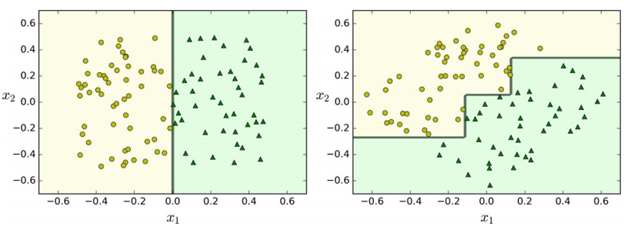

Это широко используемый алгоритм для классификации (что интересно, для регрессии его тоже используют - особенно случайный лес!)

[Документация](https://scikit-learn.ru/1-10-decision-trees/)

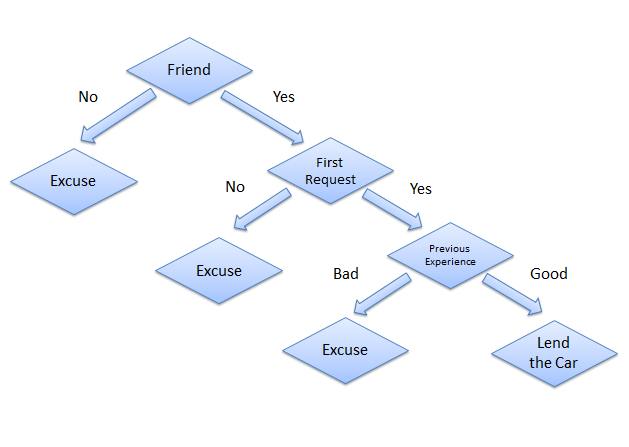

In [ ]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [ ]:
# там у нас векторы np
# но можно из него и обычный датафрейм собрать

df = pd.DataFrame(iris.data,columns=iris.feature_names)
df['target'] = iris.target
n = []
for i in df['target']:
  if i == 0:
    n.append('setosa')
  elif i == 1:
    n.append('versicolor')
  else:
    n.append('virginica')
df['target_text'] = n
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_text
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [ ]:
x = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
y = df['target']
clf = tree.DecisionTreeClassifier(
                               # максимальная глубина дерева
                               max_depth=5,
                               # минимальное число элементов в узле для разбиения (может быть долей)
                               min_samples_split=5,
                               # минимальное число элементов в листе (может быть долей)
                               min_samples_leaf=5)
                               # минимальное значение дельты impurity (примеси)
                               # min_impurity_decrease=0
clf = clf.fit(x, y)

In [ ]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target', 'target_text'],
      dtype='object')

In [ ]:
class_names=iris.target_names
class_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

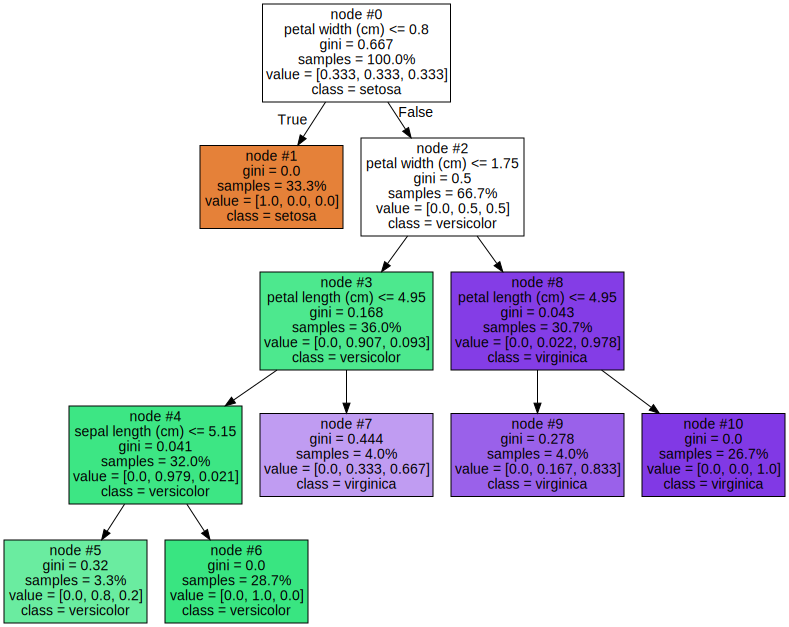

In [ ]:
dot_data = tree.export_graphviz(clf, out_file = None,
                      # задать названия столбцов
                      feature_names = df.columns[:4],
                      # названия классов - если они у нас есть, если нет, ставим None
                      class_names = ['setosa', 'versicolor', 'virginica'],
                      # показывать названия полей у численных значений внутри узла
                      label='all',
                      # раскрашивать узлы в цвет преобладающего класса
                      filled=True,
                      # показывать примеси - зашумленность, загрязненность (чем ниже, тем лучше)
                      impurity=True,
                      # показывать номера узлов
                      node_ids=True,
                      # Показывать доли каждого класса в узлах (а не количество)
                      proportion=True)
graph = graphviz.Source(dot_data)
graph

In [ ]:
# вклад, значимость каждого показателя
pd.DataFrame({'feature': df.columns[:4],
              'importance': clf.feature_importances_}).sort_values('importance', ascending=False)

,feature,importance
3,petal width (cm),0.945812
2,petal length (cm),0.050378
0,sepal length (cm),0.003809
1,sepal width (cm),0.000000


In [ ]:
# деревья решений умеют предсказывать:
new_item = [1, 1, 1, 1]
clf.predict([new_item])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
# переделаем красиво)) чтобы признаки были явно обозначены
new = pd.DataFrame(new_item).T
new.columns=df.columns[:4]
new

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,1,1,1,1


In [ ]:
clf.predict(new)

array([1])

### Проверим, насколько точна наша классификация

In [ ]:
x = df[df.columns[:4]]
y = df['target']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33)
# обучаем модель на тренировочных данных
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

In [ ]:
confusion_matrix(y_pred, y_test)

array([[12,  0,  0],
       [ 0, 20,  3],
       [ 0,  1, 14]])